# SVM Beginner Lab (scikit-learn, **No Pipelines**)

This notebook is a step-by-step lab for learning Support Vector Machines (SVM) using scikit-learn **without** using `Pipeline`.

You'll learn:
- What an SVM is and when to use it
- Why scaling features matters and how to do it safely without a pipeline
- Train/test split → train → evaluate
- Linear vs. RBF kernels
- Visualizing decision boundaries (2D example)
- Manual cross-validation and a tiny manual grid search
- Saving and reusing the scaler + model


## Setup
If you need to install packages inside the notebook, run the cell below.

In [1]:
# If needed, uncomment and run:
# !pip install scikit-learn matplotlib pandas joblib

## Step 0 — Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


## Step 1 — Load a simple dataset (Iris)

In [14]:
iris = datasets.load_iris()
X = iris.data                    # shape: (150, 4)
y = iris.target                  # 0=setosa, 1=versicolor, 2=virginica
feature_names = iris.feature_names
class_names = iris.target_names

# Preview
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
df['class'] = df['target'].map({i:n for i,n in enumerate(class_names)})
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,class
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


## Step 2 — Train/Test Split
Use stratification to keep class proportions.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

X_train.shape, X_test.shape

((120, 4), (30, 4))

## Step 3 — Scale features (**no pipeline**) 
Fit the scaler **only on the training set**, then transform both train and test.

In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

## Step 4 — Train a Linear SVM

In [6]:
svm_linear = SVC(kernel='linear', C=1.0, random_state=42)
svm_linear.fit(X_train_scaled, y_train)

y_pred_linear = svm_linear.predict(X_test_scaled)
print("Linear SVM accuracy:", accuracy_score(y_test, y_pred_linear))
print("\nConfusion matrix (linear):\n", confusion_matrix(y_test, y_pred_linear))
print("\nClassification report (linear):\n",
      classification_report(y_test, y_pred_linear, target_names=class_names))

Linear SVM accuracy: 1.0

Confusion matrix (linear):
 [[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]

Classification report (linear):
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Step 5 — Train an RBF (non-linear) SVM

In [7]:
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_rbf.fit(X_train_scaled, y_train)

y_pred_rbf = svm_rbf.predict(X_test_scaled)
print("RBF SVM accuracy:", accuracy_score(y_test, y_pred_rbf))
print("\nConfusion matrix (rbf):\n", confusion_matrix(y_test, y_pred_rbf))
print("\nClassification report (rbf):\n",
      classification_report(y_test, y_pred_rbf, target_names=class_names))

RBF SVM accuracy: 0.9666666666666667

Confusion matrix (rbf):
 [[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]

Classification report (rbf):
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



## Step 6 — Visualize decision boundaries (2D demo)
We use two petal features and only two classes so we can plot a 2D boundary.

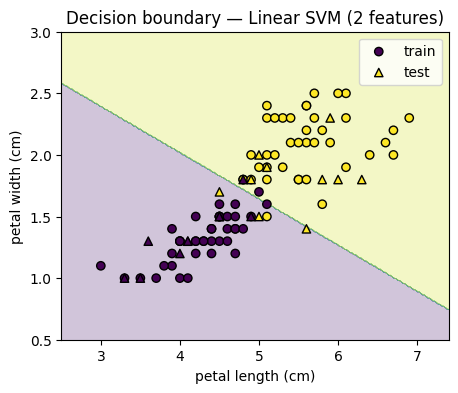

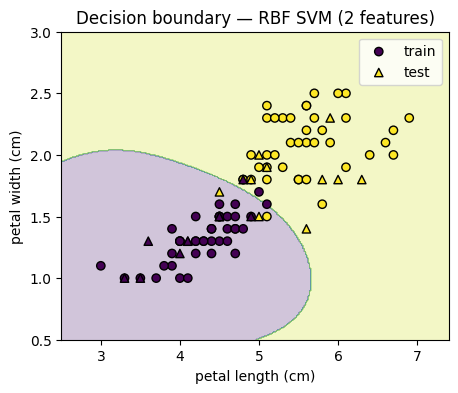

In [8]:
# Keep only classes 1 and 2 (drop setosa=0) and use petal length/width
mask = y != 0
X2 = X[mask][:, 2:4]
y2 = y[mask] - 1  # versicolor=0, virginica=1

X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=0.2, stratify=y2, random_state=42
)

scaler2 = StandardScaler()
X2_train_s = scaler2.fit_transform(X2_train)
X2_test_s  = scaler2.transform(X2_test)

svm2_linear = SVC(kernel='linear', C=1.0, random_state=42)
svm2_linear.fit(X2_train_s, y2_train)

svm2_rbf = SVC(kernel='rbf', C=1.0, gamma=0.5, random_state=42)
svm2_rbf.fit(X2_train_s, y2_train)

def plot_decision_regions(X_train, y_train, X_test, y_test, scaler, model, title):
    x_min, x_max = X_train[:,0].min()-0.5, X_train[:,0].max()+0.5
    y_min, y_max = X_train[:,1].min()-0.5, X_train[:,1].max()+0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_s = scaler.transform(grid)
    Z = model.predict(grid_s).reshape(xx.shape)

    plt.figure(figsize=(5,4))
    plt.contourf(xx, yy, Z, alpha=0.25)
    plt.scatter(X_train[:,0], X_train[:,1], c=y_train, edgecolor='k', label='train')
    plt.scatter(X_test[:,0],  X_test[:,1],  c=y_test, marker='^', edgecolor='k', label='test')
    plt.xlabel('petal length (cm)')
    plt.ylabel('petal width (cm)')
    plt.legend()
    plt.title(title)
    plt.show()

plot_decision_regions(X2_train, y2_train, X2_test, y2_test, scaler2, svm2_linear,
                      "Decision boundary — Linear SVM (2 features)")
plot_decision_regions(X2_train, y2_train, X2_test, y2_test, scaler2, svm2_rbf,
                      "Decision boundary — RBF SVM (2 features)")

## Step 7 — Manual Cross-Validation (no pipeline)

In [9]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def cv_score_rbf(X, y, C=1.0, gamma='scale'):
    scores = []
    for train_idx, val_idx in skf.split(X, y):
        X_tr, X_val = X[train_idx], X[val_idx]
        y_tr, y_val = y[train_idx], y[val_idx]

        scaler_cv = StandardScaler().fit(X_tr)
        X_tr_s = scaler_cv.transform(X_tr)
        X_val_s = scaler_cv.transform(X_val)

        clf = SVC(kernel='rbf', C=C, gamma=gamma, random_state=42)
        clf.fit(X_tr_s, y_tr)
        y_val_pred = clf.predict(X_val_s)
        scores.append(accuracy_score(y_val, y_val_pred))
    return np.mean(scores), np.std(scores)

mean_cv, std_cv = cv_score_rbf(X, y, C=1.0, gamma='scale')
print(f"5-fold CV (RBF, C=1.0, gamma='scale'): {mean_cv:.3f} ± {std_cv:.3f}")

5-fold CV (RBF, C=1.0, gamma='scale'): 0.960 ± 0.039


## Step 8 — Tiny manual grid search (tune C & gamma)

In [10]:
C_values = [0.1, 1, 10, 100]
gamma_values = [0.01, 0.1, 1.0]

best_mean, best_std, best_params = -np.inf, None, None

for C in C_values:
    for gamma in gamma_values:
        mean_cv, std_cv = cv_score_rbf(X_train, y_train, C=C, gamma=gamma)  # only on TRAIN
        print(f"C={C:<5} gamma={gamma:<4} -> CV mean={mean_cv:.3f} ± {std_cv:.3f}")
        if mean_cv > best_mean:
            best_mean, best_std = mean_cv, std_cv
            best_params = {'C': C, 'gamma': gamma}

print("\nBest CV params on TRAIN:", best_params, f"with mean={best_mean:.3f} ± {best_std:.3f}")

# Train final model on ALL training data using best params, then evaluate on test
final_scaler = StandardScaler().fit(X_train)
X_train_s_final = final_scaler.transform(X_train)
X_test_s_final  = final_scaler.transform(X_test)

final_model = SVC(kernel='rbf', **best_params, random_state=42)
final_model.fit(X_train_s_final, y_train)
final_test_pred = final_model.predict(X_test_s_final)
print("\nFinal test accuracy with tuned RBF:", accuracy_score(y_test, final_test_pred))

C=0.1   gamma=0.01 -> CV mean=0.867 ± 0.049
C=0.1   gamma=0.1  -> CV mean=0.875 ± 0.059
C=0.1   gamma=1.0  -> CV mean=0.908 ± 0.049
C=1     gamma=0.01 -> CV mean=0.900 ± 0.033
C=1     gamma=0.1  -> CV mean=0.975 ± 0.020
C=1     gamma=1.0  -> CV mean=0.958 ± 0.026
C=10    gamma=0.01 -> CV mean=0.975 ± 0.020
C=10    gamma=0.1  -> CV mean=0.967 ± 0.031
C=10    gamma=1.0  -> CV mean=0.950 ± 0.017
C=100   gamma=0.01 -> CV mean=0.958 ± 0.026
C=100   gamma=0.1  -> CV mean=0.967 ± 0.031
C=100   gamma=1.0  -> CV mean=0.958 ± 0.000

Best CV params on TRAIN: {'C': 1, 'gamma': 0.1} with mean=0.975 ± 0.020

Final test accuracy with tuned RBF: 0.9666666666666667


## Step 9 — Save your model **and** the scaler (no pipeline)

In [11]:
from joblib import dump, load

dump(final_scaler, "scaler.joblib")
dump(final_model,  "svm_rbf.joblib")

# Later… load and predict on new data
scaler_loaded = load("scaler.joblib")
model_loaded  = load("svm_rbf.joblib")

new_sample = [[5.1, 3.3, 1.7, 0.5]]  # sepal length, sepal width, petal length, petal width
new_sample_s = scaler_loaded.transform(new_sample)
pred_class_id = model_loaded.predict(new_sample_s)[0]
print("Predicted class:", class_names[pred_class_id])

Predicted class: setosa


## Mini-exercises
1. Change `C` to `0.1`, `10`, `100` for linear and RBF. What happens?
2. In Step 6, try `gamma=0.05`, `1`, `5` and redraw the boundary.
3. Replace Iris with `datasets.load_breast_cancer()` and repeat Steps 2–8.
4. Add `probability=True` to `SVC` and print `model.predict_proba(...)`.
5. Create your own dataset with `sklearn.datasets.make_classification` and test.